In [167]:
import pandas as pd 
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas_datareader import data
import pandas_datareader as pdr
from pathlib import Path 

import dash
import dash_core_components as dcc
import dash_html_components as html

'''
Data Frames created:
broker_file = data from broker with [tickers, shares, last, close, mktvalue]
price_df = daily ytd prices of all positions 
daily_percent_change = daily percent change of all tickers
ticker_position= ticker and shares for each position
weightings = weights of all positions in the portfolio based on market value
'''


'\nData Frames created:\nbroker_file = data from broker with [tickers, shares, last, close, mktvalue]\nprice_df = daily ytd prices of all positions \ndaily_percent_change = daily percent change of all tickers\nticker_position= ticker and shares for each position\nweightings = weights of all positions in the portfolio based on market value\n'

In [244]:
cash= 26572.84
broker_file =pd.read_csv(Path('shf_positions.csv'))
daily_balance = pd.read_csv(Path('daily_balance.csv'))

daily_balance['date'] = pd.to_datetime(daily_balance['date'])

daily_balance.replace(',','', regex=True, inplace=True)
daily_balance['aum'] = daily_balance['aum'].astype(float)
daily_balance.info()
display(broker_file.head())
display(daily_balance.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    230 non-null    datetime64[ns]
 1   aum     230 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.7 KB


,Symbol,Description,Qty,Last,Close,Mkt value,Gain ($),Gain (%),Cost/share,P/E
0,CCJ,Cameco Corporation Common Stock,500,25.29,26.64,"12,645.00","9,118.69",258.59%,7.05262,--
1,ARKK,ARK Innovation ETF,70,113.24,113.82,"7,936.60","5,342.32",205.93%,37.06114,--
2,ARKG,ARK Genomic Revolution ETF,85,68.53,69.12,"5,825.90","3,400.63",140.22%,28.53259,--
3,XLK,SPDR Select Sector Fund - Technology,420,171.31,170.07,"71,950.20","35,672.07",98.33%,86.37650,--
4,DG,Dollar General Corporation Common Stock,160,224.55,222.34,"35,928.00","17,194.17",91.78%,117.08644,21.30X


,date,aum
0,2021-01-01,676001.97
1,2021-01-04,668975.07
2,2021-01-05,670881.32
3,2021-01-06,676514.02
4,2021-01-07,683265.92


In [286]:
#cleaning file --getting rid of commas in str and converting to floats instead of objects
broker_file.replace(',','', regex=True, inplace=True)
broker_file['Mkt value'] =broker_file['Mkt value'].astype(float)
aum = broker_file['Mkt value'].sum() + cash 
broker_file.head()

,Symbol,Description,Qty,Last,Close,Mkt value,Gain ($),Gain (%),Cost/share,P/E
0,CCJ,Cameco Corporation Common Stock,500,25.29,26.64,12645.0,9118.69,258.59%,7.05262,--
1,ARKK,ARK Innovation ETF,70,113.24,113.82,7936.6,5342.32,205.93%,37.06114,--
2,ARKG,ARK Genomic Revolution ETF,85,68.53,69.12,5825.9,3400.63,140.22%,28.53259,--
3,XLK,SPDR Select Sector Fund - Technology,420,171.31,170.07,71950.2,35672.07,98.33%,86.37650,--
4,DG,Dollar General Corporation Common Stock,160,224.55,222.34,35928.0,17194.17,91.78%,117.08644,21.30X


In [215]:
tickers  = shf_positions['Symbol'].tolist()
weights = []

for i in broker_file:
    weight = broker_file['Mkt value']/aum
    weights.append(weight)
    break
ticker_weights = list(zip(tickers, weights))



In [199]:
# creating ticker list 
#importing data
symbol= tickers
start='2020-12-31'
end='2021-11-19'

price_df=data.get_data_yahoo(symbol, start, end)['Close']
#price_df.head()


C:\Users\jmuen\anaconda3\envs\viz\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'BRK.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [222]:
#creating daily percent change df 

daily_percent_change = price_df.pct_change()
daily_percent_change = daily_percent_change[1:]
#daily_percent_change.head(30)

In [304]:
ticker_position = broker_file[['Symbol','Qty', 'Mkt value']]
ticker_position.head(30)

,Symbol,Qty,Mkt value
0,CCJ,500,12645.00
1,ARKK,70,7936.60
2,ARKG,85,5825.90
3,XLK,420,71950.20
4,DG,160,35928.00
5,NKE,50,8750.00
6,FB,30,10365.00
7,INFO,335,43265.25
8,BA,60,12852.00
9,SPY,60,28143.00


In [218]:
correlations  = daily_percent_change.corr(method='pearson')
correlations

Symbols,CCJ,ARKK,ARKG,XLK,DG,NKE,FB,INFO,BA,SPY,...,EA,XLP,DGS,C,XLU,VZ,T,PAA,SND,BRK.B
Symbols,,,,,,,,,,,,,,,,,,,,,
CCJ,1.000000,0.268516,0.285110,0.200507,0.013482,0.166250,0.115100,0.031776,0.329174,0.275411,...,0.117516,0.058933,0.390424,0.263305,-0.055675,-0.082729,0.049658,0.297895,0.357154,NaN
ARKK,0.268516,1.000000,0.936229,0.655537,0.236145,0.267111,0.419607,0.190093,0.345147,0.545708,...,0.330348,-0.000799,0.525031,0.137339,0.028288,-0.230500,-0.119952,0.174443,0.184856,NaN
ARKG,0.285110,0.936229,1.000000,0.599112,0.232298,0.290509,0.368893,0.219371,0.343979,0.534497,...,0.301489,0.030051,0.511322,0.161639,0.078127,-0.161831,-0.080365,0.215907,0.225114,NaN
XLK,0.200507,0.655537,0.599112,1.000000,0.346428,0.365294,0.592856,0.512999,0.317969,0.880159,...,0.390410,0.395740,0.529793,0.169016,0.231715,-0.006702,0.029993,0.176793,0.126112,NaN
DG,0.013482,0.236145,0.232298,0.346428,1.000000,0.148616,0.231579,0.307578,0.111951,0.387012,...,0.102124,0.393793,0.184723,0.064212,0.353552,0.163830,0.123782,0.071111,0.136644,NaN
NKE,0.166250,0.267111,0.290509,0.365294,0.148616,1.000000,0.193424,0.265075,0.129293,0.437174,...,0.133556,0.258852,0.278077,0.131883,0.201848,0.073071,0.062252,0.068258,0.081247,NaN
FB,0.115100,0.419607,0.368893,0.592856,0.231579,0.193424,1.000000,0.272834,0.206013,0.534537,...,0.360726,0.256147,0.324443,-0.014176,0.159227,0.041208,0.061480,0.056022,-0.019102,NaN
INFO,0.031776,0.190093,0.219371,0.512999,0.307578,0.265075,0.272834,1.000000,0.194842,0.567876,...,0.115181,0.432789,0.226466,0.083130,0.346597,0.221646,0.186579,0.078832,0.124865,NaN
BA,0.329174,0.345147,0.343979,0.317969,0.111951,0.129293,0.206013,0.194842,1.000000,0.503281,...,0.027738,0.225327,0.375093,0.576484,0.127719,0.095979,0.208928,0.490497,0.292064,NaN


In [292]:
daily_percent_change.head(2)

Symbols,CCJ,ARKK,ARKG,XLK,DG,NKE,FB,INFO,BA,SPY,...,EA,XLP,DGS,C,XLU,VZ,T,PAA,SND,BRK.B
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,-0.000746,0.001607,-0.001287,-0.016305,-0.002805,-0.009684,-0.015449,0.012023,-0.052976,-0.013614,...,-0.028482,-0.010823,0.005029,-0.024651,-0.025199,0.001702,0.023644,-0.004854,0.122093,NaN
2021-01-05,0.088125,0.024621,0.013260,0.006489,-0.014210,0.008066,0.007548,-0.012100,0.043952,0.006887,...,0.012974,0.000000,0.011676,0.025939,-0.000164,-0.004588,-0.006114,0.059756,-0.056995,NaN


In [311]:
#daily_percent_change.head
variance= daily_percent_change['SPY'].var()
beta_table = []

for i in daily_percent_change:
    covariance = daily_percent_change[i].cov(daily_percent_change['SPY'])
    beta = covariance/variance 
    beta_table.append(beta)

shf_betas = list(zip(tickers, beta_table))

shf_betas = pd.DataFrame(shf_beta)
shf_betas.columns = ['Ticker', '1yr Beta']

shf_betas


,Ticker,1yr Beta
0,CCJ,1.280835
1,ARKK,1.687688
2,ARKG,1.590859
3,XLK,1.303208
4,DG,0.650898
5,NKE,0.999041
6,FB,1.265071
7,INFO,0.984926
8,BA,1.422664
9,SPY,1.000000


In [245]:
daily_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    230 non-null    datetime64[ns]
 1   aum     230 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.7 KB


<AxesSubplot:title={'center':'South Hill Equity Fund YTD Portfolio Returns'}, xlabel='date'>

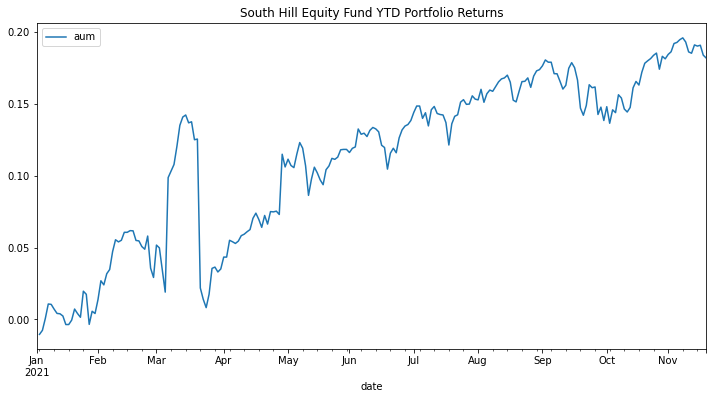

In [274]:
#Portfolio returns

#daily_balance = daily_balance.set_index('date')

portfolio_daily_returns = daily_balance.pct_change()
portfolio_daily_returns.rename(columns ={'aum':'returns'})
cumulative_portfolio_returns =(1 + portfolio_daily_returns).cumprod() - 1

cumulative_portfolio_returns.plot(figsize=(12,6), title ='South Hill Equity Fund YTD Portfolio Returns')

In [270]:
portfolio_daily_returns.head()

,aum
date,
2021-01-01,NaN
2021-01-04,-0.010395
2021-01-05,0.002850
2021-01-06,0.008396
2021-01-07,0.009980


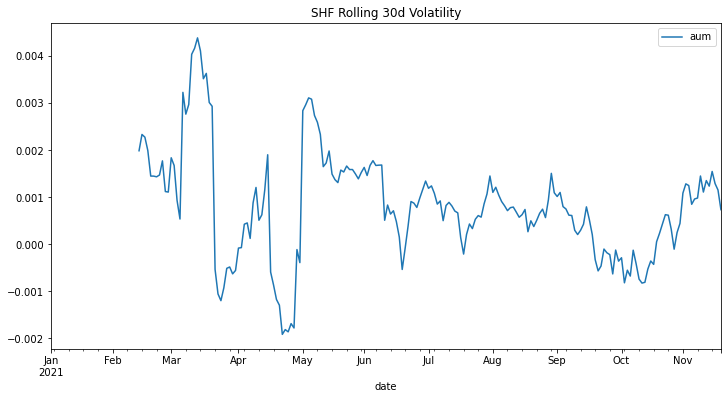

In [285]:
#Rolling beta and Std Deviations 

#annualized_shf_std
portfolio_daily_returns.rolling(window=30).mean().plot(figsize=(12,6), title = 'SHF Rolling 30d Volatility');

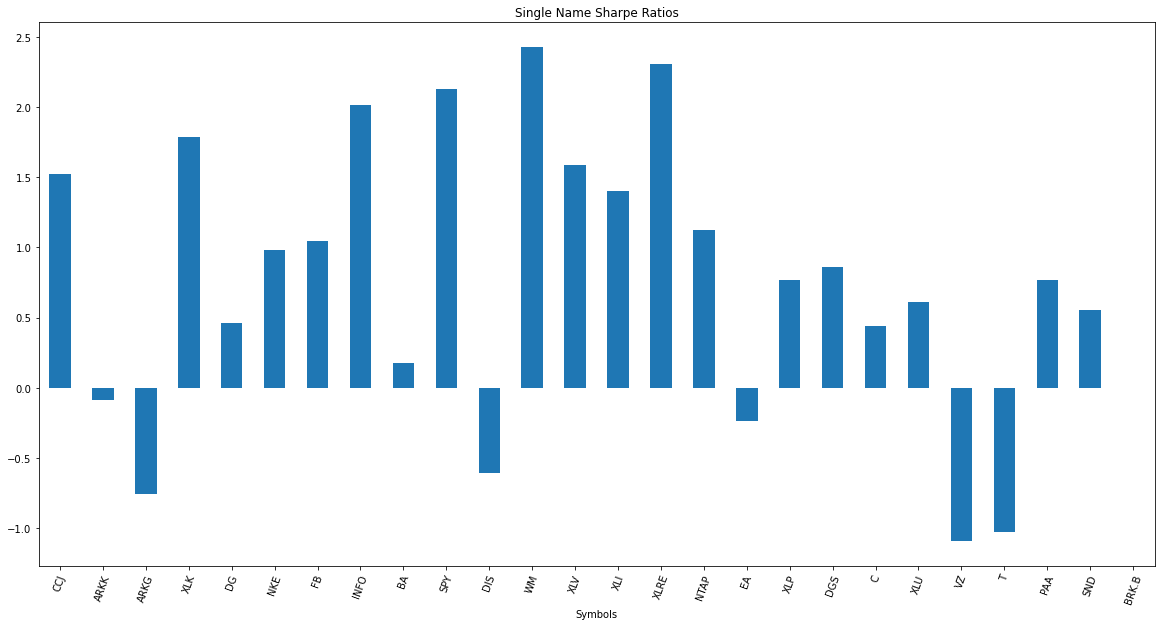

In [161]:
#sharpe ratios of individual names 
average_annual_return = daily_percent_change.mean()*252
annualized_std_deviaton = daily_percent_change.std()*252**(1/2)
sharpe_ratios= average_annual_return/annualized_std_deviaton

sharpe_ratios.plot.bar(figsize=(20,10),title = 'Single Name Sharpe Ratios', rot =70);


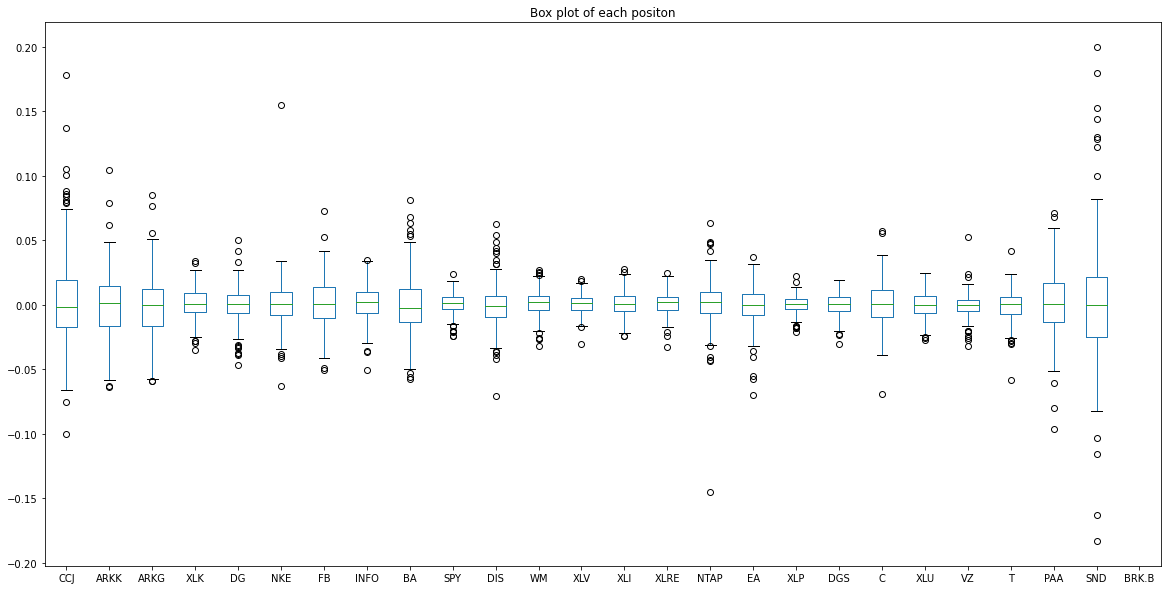

In [139]:
daily_percent_change.plot.box(figsize = (20,10), title = 'Box plot of each positon');

In [121]:
cumulative_returns = (1+daily_percent_change).cumprod()-1
cumulative_returns.hvplot.line(figsize= (20,10), title='YTD Cumulative Returns')

:NdOverlay   [Symbols]
   :Curve   [Date]   (value)

In [59]:
daily_percent_change.hvplot.line(figsize =(20,10))

:NdOverlay   [Symbols]
   :Curve   [Date]   (value)

In [153]:
daily_balance.hvplot.line(title = 'Daily AUM for 2021')

:Curve   [index]   (Account value)